# Time Series Forecasting - Part 1: Fundamentals

* Time Series - A sequence of observations made over a period of time.
* For example - Sales of a product over time, Total energy consumption at an EV station over time etc.

* Let's pickup a time series dataset and see how it looks like.
* We will use pandas to read a csv file.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Alcohol_Sales.csv",parse_dates=True,index_col="DATE")
df.columns = ["Sales"]
df.head()

Sales
DATE             
1992-01-01   3459
1992-02-01   3458
1992-03-01   4002
1992-04-01   4564
1992-05-01   4221

* Now, let's plot the data and visualize it.

<AxesSubplot:xlabel='DATE'>

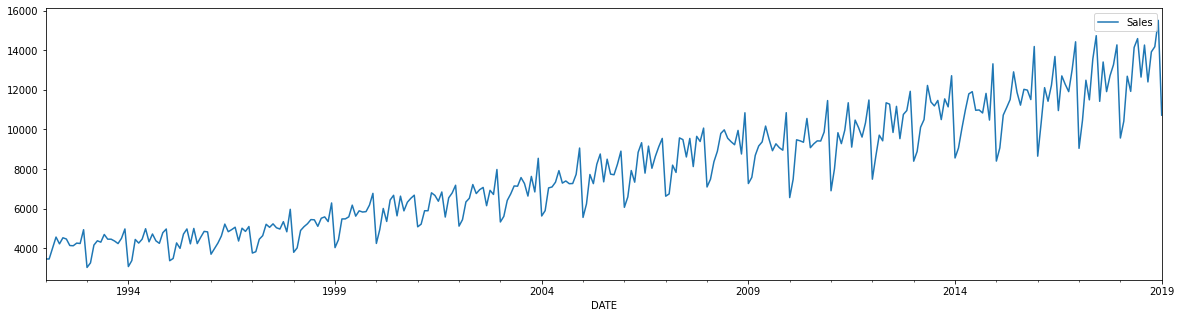

In [3]:
df.plot(figsize=(20,5))

* A time series has 4 components -
1. Base component
2. Trend component
3. Seasonal component
4. Error component or Noise

* Just by looking at the time series plot, we can infer that it has positive trend(i.e., it increases over time) and it has seasonal component as well. But, we cannot visualize the noise component.
* (Note - Sometimes, just by looking at the plot, you may not be able to decipher the precence of trend or seasonal component, hence we need to decompose the graph into its components to get the gist of it.)

* Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative series.

* A series which increases or decreases at a constant rate can be considered as Additive and a series which increases or decreases exponentially can be considered as multiplicative.

1. Additive = Base + Trend + Seasonality + Noise
2. Multiplicative = Base * Trend * Seasonality * Noise

In [4]:
from tkinter import E
from statsmodels.tsa.seasonal import seasonal_decompose

add_result = seasonal_decompose(df["Sales"], model="Additive",extrapolate_trend="freq")
mul_result = seasonal_decompose(df["Sales"], model="Multiplicative")

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(20,10)})

Text(0.5, 0.98, 'Additive Decomposition')

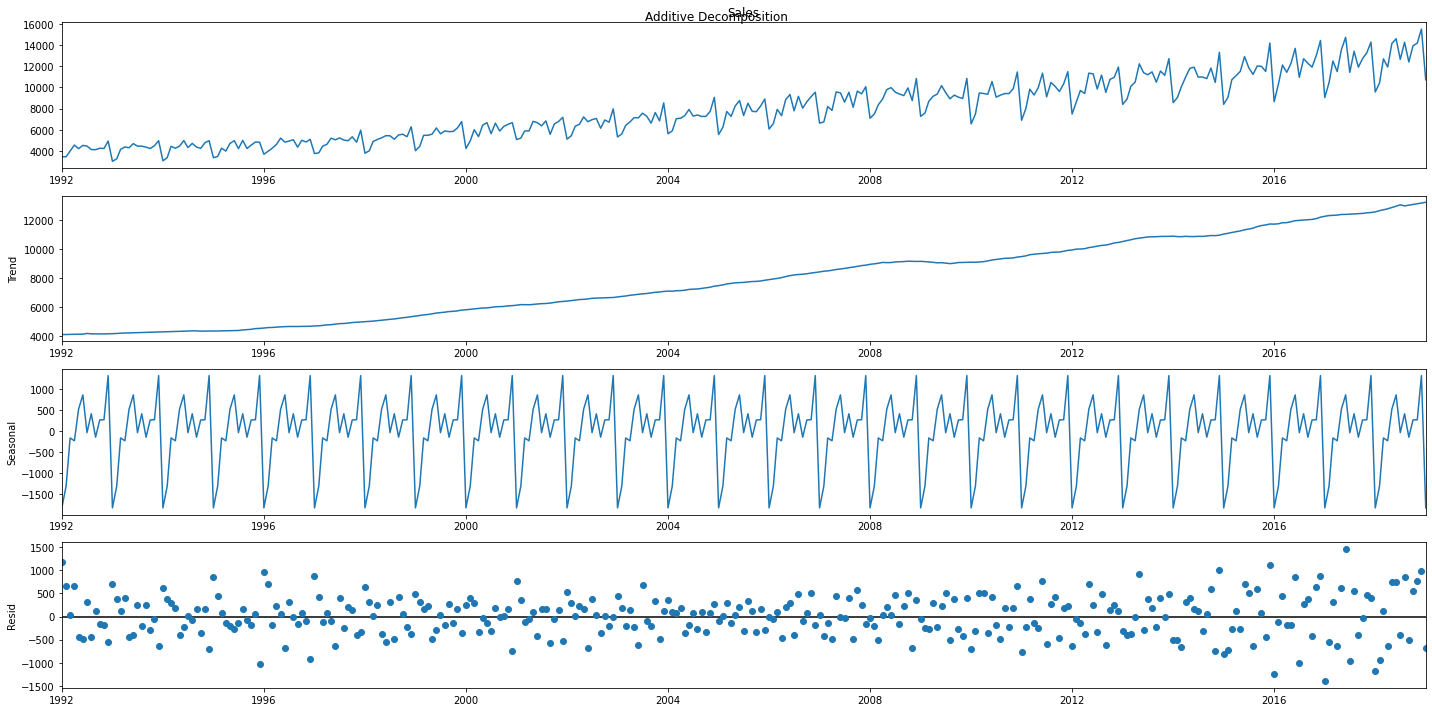

In [6]:
add_result.plot().suptitle("Additive Decomposition")

Text(0.5, 0.98, 'Multiplicative Decomposition')

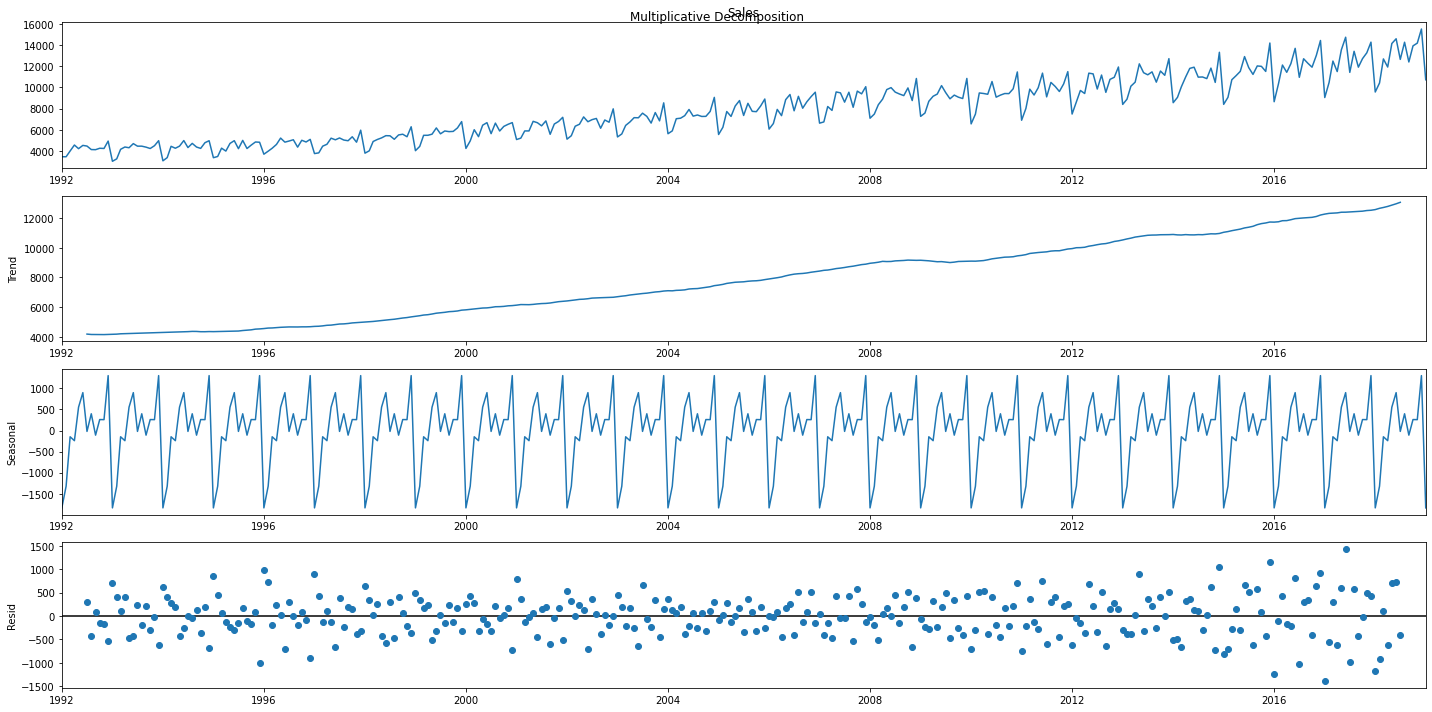

In [7]:
mul_result.plot().suptitle("Multiplicative Decomposition")

* Since, the decomposition looks more or less same in both the cases, and the time series doesn't change exponentially, hence, we will consider this as an Additive Series.

Now, let's see the values of the different component of our time series.

In [8]:
decomposed_df = pd.concat([add_result.observed, add_result.trend, add_result.seasonal, add_result.resid],axis=1)
decomposed_df.columns = ["Actual", "Trend", "Seasonal", "Resid"]
decomposed_df.head()

Actual        Trend     Seasonal        Resid
DATE                                                     
1992-01-01  3459.0  4104.283314 -1828.891598  1183.608284
1992-02-01  3458.0  4110.913267 -1307.720683   654.807416
1992-03-01  4002.0  4117.543221  -158.234756    42.691535
1992-04-01  4564.0  4124.173174  -226.327532   666.154358
1992-05-01  4221.0  4130.803127   526.604383  -436.407511

* Now, we can clearly see that our time series is not stationary based on visual inspection and the decomposed time series. We can see that the mean is not constant over time(presence of positive trend) as well as it has seasonal patterns.

* What is Stationarity?
    - Stationarity is a property of time series in which the statistical properties such as mean, variance and autocorrelation should be more or less, constant over time.

* How to make a time series stationary?
    1. Differencing, i.e., subtracting the next value with the current value or seasonal differncing
    2. Log transformation
    3. nth root of the series
    4. combination of above

* Why to make a time series stationary?
    1. Makes the forecast more reliable
    2. Autoregressive forecasting is essentially a linear regression that uses it's lag values as predictors.
    3. And, we know that linear regression works best when predictors are not correlated.
    4. Hence, stationarizing the series helps us to get rid of this issue.

* But, we can perform a statistical test inorder to confirm our assumptions. Statistical tests are also handy incase we need to check the stationarity of multiple time series and it helps us to automate the test process.

* There are various methods for checking whether a time series is stationary or not. Few of them are ADF test, KPSS test etc.

So, let's select ADF test (Augmented Dickey Fuller test) as it is one of the most common and effective method.

* Null Hypothesis(h0) - The given time series is non-stationary.
* Alternate Hypothesis - Given time series is stationary if p-value < 0.05.

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def adfuller_test(data):
    result = adfuller(data, autolag="AIC")
    print("ADF Statistics:",result[0])
    print("p-value:",result[1])
    print("No. of lags:",result[2])
    print("No. of observations used:",result[3])
    print("Critical values:\n")
    for key,value in result[4].items():
        print(key,":",value)

In [14]:
adfuller_test(df["Sales"])

ADF Statistics: 2.037404725913701
p-value: 0.9987196267088919
No. of lags: 14
No. of observations used: 310
Critical values:

1% : -3.451621854687657
5% : -2.870908950689806
10% : -2.571761810613944


* As, we can see that the p-value of the time series is 0.998, which is greater than 0.05. Hence, the given time series is not stationary.

* Case 1: Detrend the time series

In [15]:
df["detrended_sales"] = decomposed_df["Actual"] - decomposed_df["Trend"]
df.head()

Sales  detrended_sales
DATE                              
1992-01-01   3459      -645.283314
1992-02-01   3458      -652.913267
1992-03-01   4002      -115.543221
1992-04-01   4564       439.826826
1992-05-01   4221        90.196873

<AxesSubplot:xlabel='DATE'>

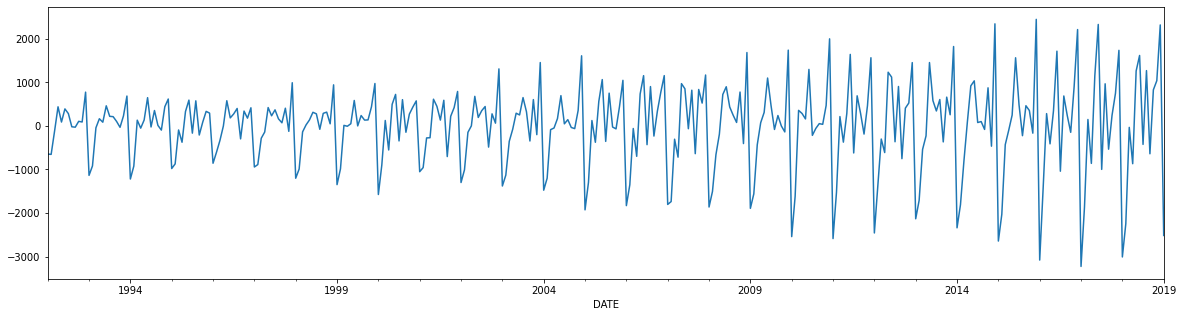

In [16]:
df["detrended_sales"].plot(figsize=(20,5))

In [17]:
# Lets check for the stationarity
adfuller_test(df["detrended_sales"])

ADF Statistics: -8.215644809875206
p-value: 6.635629083613242e-13
No. of lags: 14
No. of observations used: 310
Critical values:

1% : -3.451621854687657
5% : -2.870908950689806
10% : -2.571761810613944


* Now, lets check for missing values

In [18]:
df.isna().sum()

Sales              0
detrended_sales    0
dtype: int64